In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from helper import get_dataset_with_copy

### Pandas configuration
Configure pandas display settings to show more data in our notebook outputs
This helps us see more rows and columns when examining our dataframes, rather than having them truncated with ellipsis (...) 

In [2]:
# This will be set to see most of the infomation of any print that i make
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000); 

### File reading and copy variable declaration
We create two versions of our dataframe: main and copy
The copy preserves our original, untouched data as a backup reference, while the main dataframe will be used for active analysis and transformations.
This is particularly useful in Jupyter notebooks where we can always refer back to the original state of our data without reloading the file or having to restart the notebook to run it all again

In [ ]:
# Detect the file encoding
jaguar_data_original, jaguar_data = get_dataset_with_copy('datasets/jaguar_movement_data.csv')

jaguar_info_original, jaguar_info = get_dataset_with_copy('datasets/jaguar_additional_information_2.csv')

/Users/ricardofernandes/Code/ML/helper.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_original = pd.read_csv(file_path)


### Data Visualization

#### Initial Data Exploration
Display basic information about both datasets including their structure and dimensions

In [4]:
print(jaguar_data_original.head())
print(jaguar_data_original.shape)
print(jaguar_info_original.head())
print(jaguar_info_original.shape)

   Event_ID      timestamp  location.long  location.lat  \
0       1.0  6/15/10 22:43     -58.030128    -23.326947   
1       2.0   6/16/10 2:52     -58.030643    -23.328427   
2       3.0  6/16/10 22:36     -58.030472    -23.327311   
3       4.0  6/17/10 16:42     -58.027983    -23.309952   
4       5.0  6/17/10 20:37     -58.027747    -23.310006   

  individual.taxon.canonical.name tag.local.identifier  \
0                   Panthera onca             0-333005   
1                   Panthera onca             0-333005   
2                   Panthera onca             0-333005   
3                   Panthera onca             0-333005   
4                   Panthera onca             0-333005   

   individual.local.identifier (ID)   study.name   country  
0                                 1  Humid Chaco  Paraguay  
1                                 1  Humid Chaco  Paraguay  
2                                 1  Humid Chaco  Paraguay  
3                                 1  Humid Chaco  Pa

Check detailed information about data types and null values in both datasets

In [5]:
print(jaguar_data_original.info())
print(jaguar_info_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134690 entries, 0 to 134689
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Event_ID                          134690 non-null  float64
 1   timestamp                         134690 non-null  object 
 2   location.long                     134690 non-null  float64
 3   location.lat                      134690 non-null  float64
 4   individual.taxon.canonical.name   134690 non-null  object 
 5   tag.local.identifier              134690 non-null  object 
 6   individual.local.identifier (ID)  134690 non-null  int64  
 7   study.name                        134690 non-null  object 
 8   country                           134690 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 9.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 9 columns):
 #   Column    

#### Gender Analysis
Analyze and visualize gender distribution

In [6]:
print(jaguar_info_original['Sex'].unique())
gender = jaguar_info_original['Sex'].value_counts()

['Female' 'Male']


Create bar plot for gender distribution

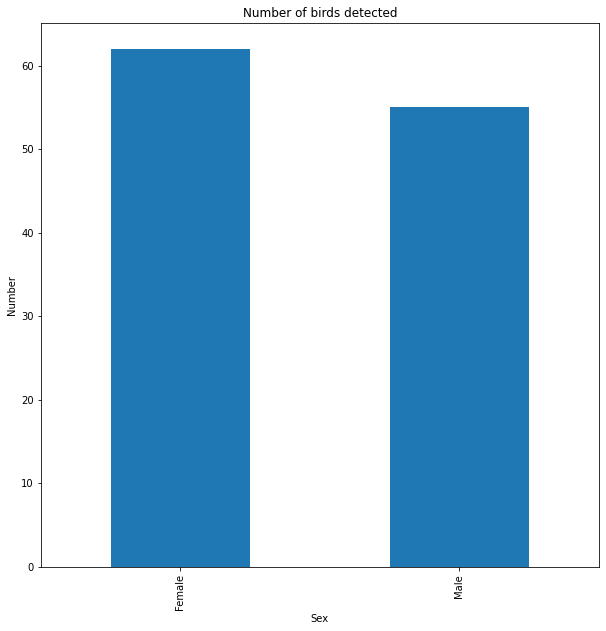

In [7]:
gender.plot(kind='bar',figsize=(10,10))
plt.title('Number of birds detected')
plt.xlabel('Sex')
plt.ylabel('Number')
plt.show()

#### Data Quality Check
Check for missing values in both datasets

In [8]:
print(jaguar_data_original.isnull().sum())
print("---------")
print(jaguar_info_original.isnull().sum())

Event_ID                            0
timestamp                           0
location.long                       0
location.lat                        0
individual.taxon.canonical.name     0
tag.local.identifier                0
individual.local.identifier (ID)    0
study.name                          0
country                             0
dtype: int64
---------
ID                  0
Sex                 0
Estimated Age       2
Weight              9
Collar Type         0
Collar Brand        0
Planned Schedule    0
Project Leader      0
Contact             0
dtype: int64


Check unique values in both datasets

In [9]:
print(jaguar_data_original.nunique())
print("---------")
print(jaguar_info_original.nunique())

Event_ID                            134690
timestamp                            88147
location.long                       122012
location.lat                        124414
individual.taxon.canonical.name          1
tag.local.identifier                   113
individual.local.identifier (ID)       117
study.name                              20
country                                  5
dtype: int64
---------
ID                  117
Sex                   2
Estimated Age        15
Weight               63
Collar Type           6
Collar Brand          7
Planned Schedule     13
Project Leader       18
Contact              18
dtype: int64
